# Compound Standardization with DeepMol

Standardization is the process of converting a chemical structure to a standardized format using a set of rules. The standardized format enables the chemical structure to be easily compared with other chemical structures and used in various computational applications.

It is possible to standardize the loaded molecules using three option. Using a basic standardizer that only does sanitization (Kekulize, check valencies, set aromaticity, conjugation and hybridization). A more complex standardizer can be customized by choosing or not to perform specific tasks such as sanitization, remove isotope information, neutralize charges, remove stereochemistry and remove smaller fragments. Another possibility is to use the ChEMBL Standardizer.

In [2]:
from deepmol.datasets import SmilesDataset

# list of non-standardized smiles
smiles_non_standardized = [
    'C[N@H+](C)[C@@H](O)[C@@H](O)CO',
    'CC[C@H]1C=C[C@@H](C1)C(=O)O[C@@H]2[C@H](C[C@H](O2)COP(=O)([O-])[O-])N',
    'CC(C)[C@H](NC(=O)[C@H](Cc1ccccc1)N(C)C)C(=O)O[C@@H]2[C@@H](O)[C@@H](O)[C@H](O)[C@H]2O',
    '[Fe]c1cccc(c1)C(=O)O.[Cl-]',
    'CC(=O)N[C@@H]1[C@H]2CCC(=O)N2C[C@H]2[C@@H](CC[C@H]12)OC(=O)C(F)(F)F',
    'CN1[C@@H]([C@H](C=C(C1)C(=O)NCc2ccccc2)C(=O)N[C@H](C(C)C)C(=O)N)O.C[NH3+]'
]

# Let's create a small dataset with our non-standardized smiles
df = SmilesDataset(smiles=smiles_non_standardized)

### Let's see how our molecules look like using RDKit

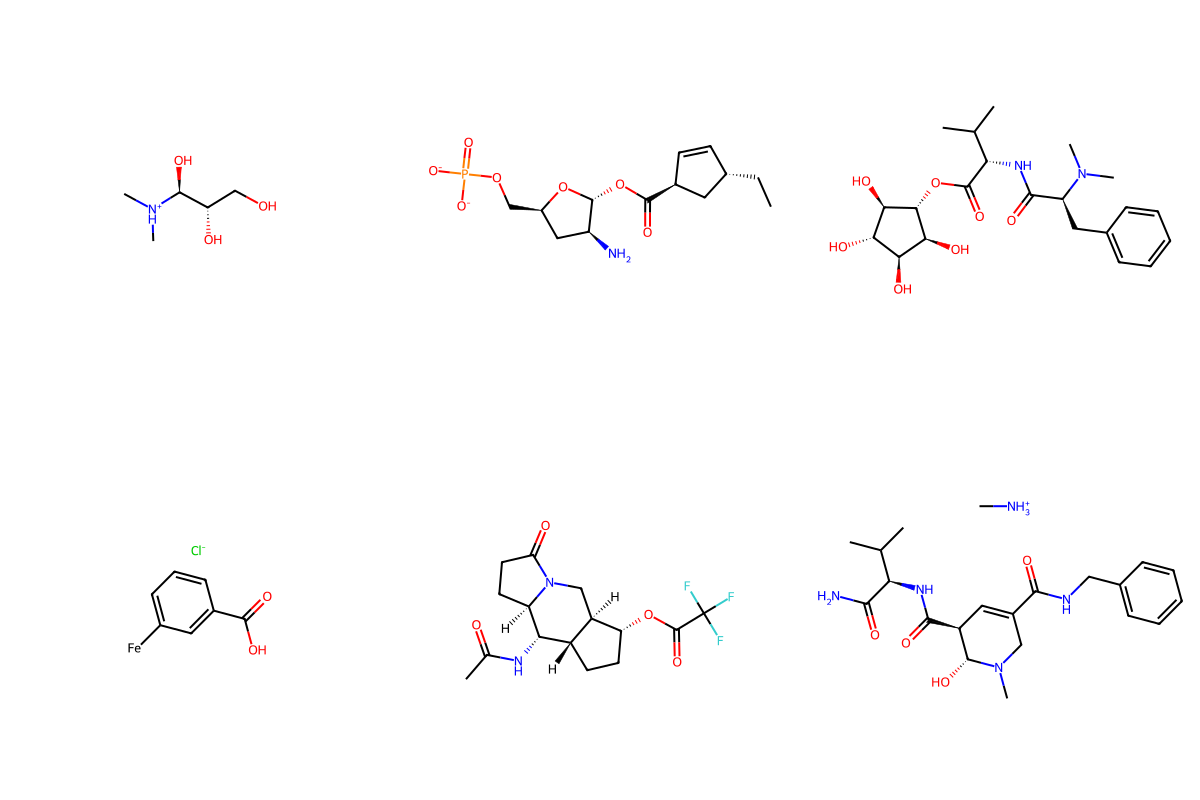

In [3]:
from rdkit.Chem import Draw
from IPython.display import SVG, display

# non standard molecules
mols_non_standardized = df.mols
# Draw the molecules to a grid image
img = Draw.MolsToGridImage(mols_non_standardized, molsPerRow=3, subImgSize=(400, 400), useSVG=True)
# Get the SVG image from the grid image
svg = img.data
# Display the SVG image using the IPython.display.SVG object
display(SVG(svg))

## Standardization using the BasicStandardizer

The BasicStandardizer only does sanitization (Kekulize, check valencies, set aromaticity, conjugation and hybridization).
To perform the standardization we need to call the `standardize` method with the dataset as input.

In [ ]:
from deepmol.standardizer import BasicStandardizer
from copy import deepcopy

# Let's create a copy of our dataset
d1 = deepcopy(df)

# Let's standardize our dataset using the BasicStandardizer
basic_standardizer = BasicStandardizer()
basic_standardizer.standardize(d1)

### Let's see how our molecules look like after standardization

With this standardizer you can only notice small changes in the molecules as only sanitization is done.
Some visible changes were mainly due to the conversion of all chiral centers to a consistent configuration, removal of explicit hydrogens, and standardization of atom order.


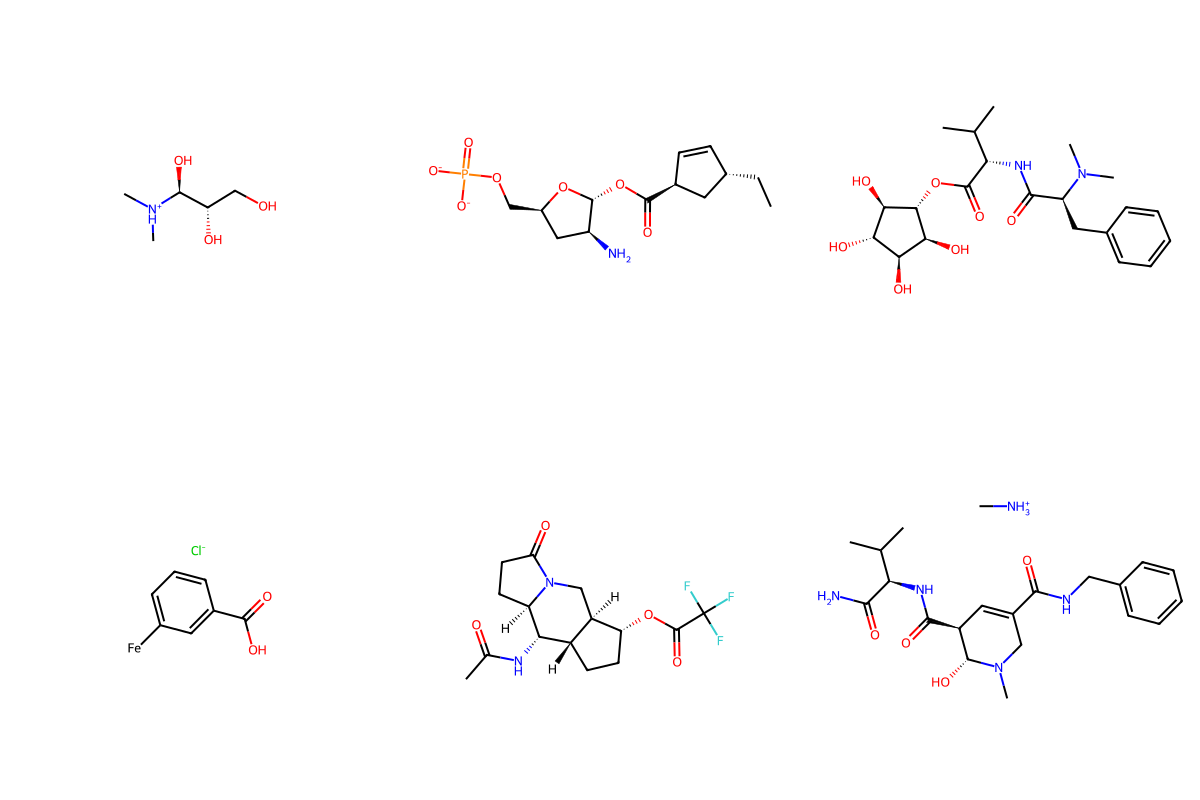

In [5]:
# Standardized molecules
mols_standardized = d1.mols
# Draw the molecules to a grid image
img = Draw.MolsToGridImage(mols_standardized, molsPerRow=3, subImgSize=(400, 400), useSVG=True)
# Get the SVG image from the grid image
svg = img.data
# Display the SVG image using the IPython.display.SVG object
display(SVG(svg))

# Standardization using the CustomStandardizer

In the custom standardizer you can choose which tasks to perform. The default tasks are:
- Remove isotope information (default: False)
- Neutralize charges (default: False)
- Remove stereochemistry (default: True)
- Remove smaller fragments (default: False)
- Add explicit hydrogens (default: False)
- Kekulize (default: False)
- Neutralize charges again (default: True)

In [ ]:
from deepmol.standardizer import CustomStandardizer

# Let's create a copy of our dataset
d2 = deepcopy(df)

# Define the standardization steps
standardization_steps = {'REMOVE_ISOTOPE': True,
                        'NEUTRALISE_CHARGE': True,
                        'REMOVE_STEREO': True,
                        'KEEP_BIGGEST': True,
                        'ADD_HYDROGEN': False,
                        'KEKULIZE': True,
                        'NEUTRALISE_CHARGE_LATE': True}

# Let's standardize our dataset using the CustomStandardizer
custom_standardizer = CustomStandardizer(standardization_steps)
custom_standardizer.standardize(d2)

### Let's see how our molecules look like after standardization

As we can see the standadized molecules do not contain any isotopic information, the charges are neutralized, do not contain any stereochemistry information (e.g. chirality centers), and smaller fragments are removed.

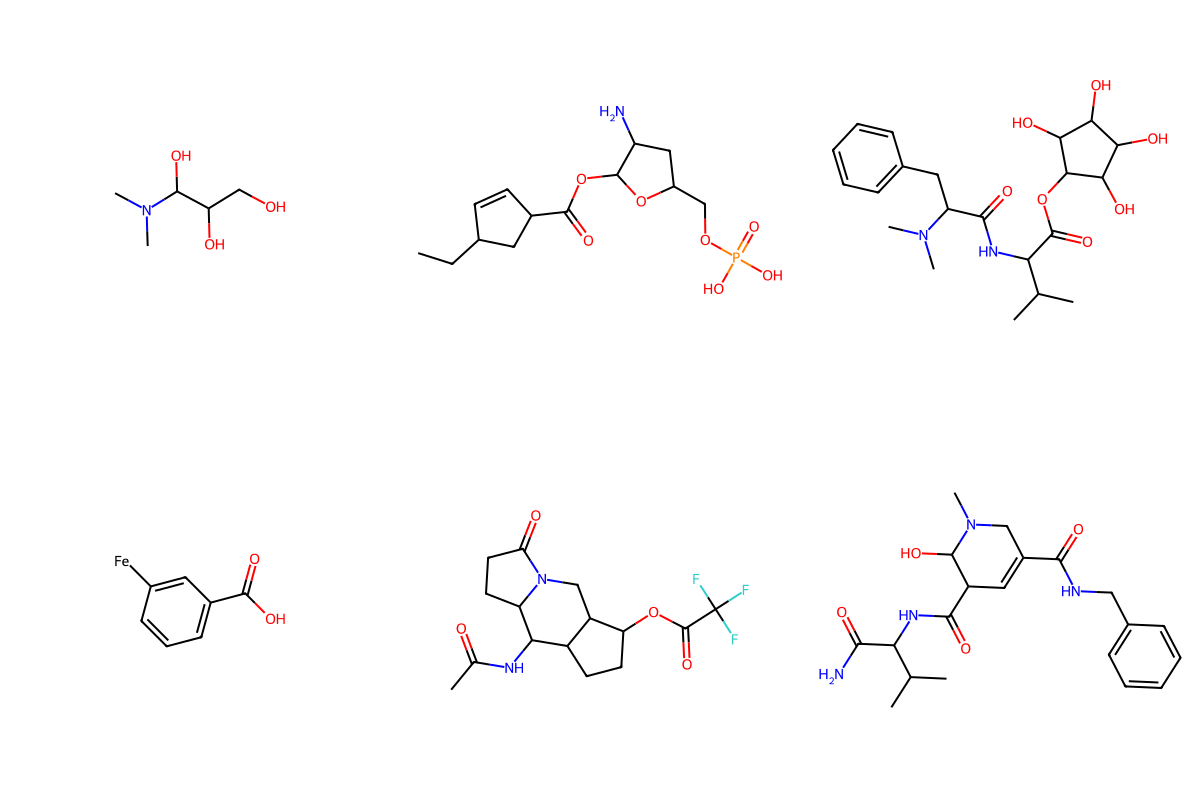

In [8]:
# Standardized molecules
mols_standardized = d2.mols
# Draw the molecules to a grid image
img = Draw.MolsToGridImage(mols_standardized, molsPerRow=3, subImgSize=(400, 400), useSVG=True)
# Get the SVG image from the grid image
svg = img.data
# Display the SVG image using the IPython.display.SVG object
display(SVG(svg))

# Standardization using the ChEMBLStandardizer

[https://github.com/chembl/ChEMBL_Structure_Pipeline](https://github.com/chembl/ChEMBL_Structure_Pipeline)

The ChEMBLStandardizer uses ChEMBL protocols used to standardise and salt strip molecules.

In [10]:
from deepmol.standardizer import ChEMBLStandardizer

# Let's create a copy of our dataset
d3 = deepcopy(df)

# Let's standardize our dataset using the ChEMBLStandardizer
chembl_standardizer = ChEMBLStandardizer()
chembl_standardizer.standardize(d3)

2023-03-15 19:44:56,301 — INFO — Standardizer ChEMBLStandardizer initialized with -1 jobs.


[19:44:56] Running Normalizer
[19:44:56] Running Normalizer
[19:44:56] Running Normalizer
[19:44:56] Running Uncharger
[19:44:56] Running Normalizer
[19:44:56] Running Uncharger
[19:44:56] Running Uncharger
[19:44:56] Removed negative charge.
[19:44:56] Running Normalizer
[19:44:56] Running Uncharger
[19:44:56] Removed negative charge.
[19:44:56] Running Uncharger
[19:44:56] Removed positive charge.
[19:44:56] Running Uncharger
[19:44:56] Running Uncharger
[19:44:56] Running Uncharger
[19:44:56] Running Uncharger
[19:44:56] Running Uncharger
[19:44:56] Running Uncharger
[19:44:56] Running Uncharger
[19:44:56] Running Uncharger
[19:44:56] Running Uncharger
[19:44:56] Running Uncharger
[19:44:56] Running Uncharger
[19:44:56] Removed negative charge.
[19:44:56] Running Uncharger
[19:44:56] Running Uncharger


### Let's see how our molecules look like after standardization

As we can see these molecules also underwent a more complex standardization process than the BasicStandardizer but in a less extensive way than the CustomStandardizer.

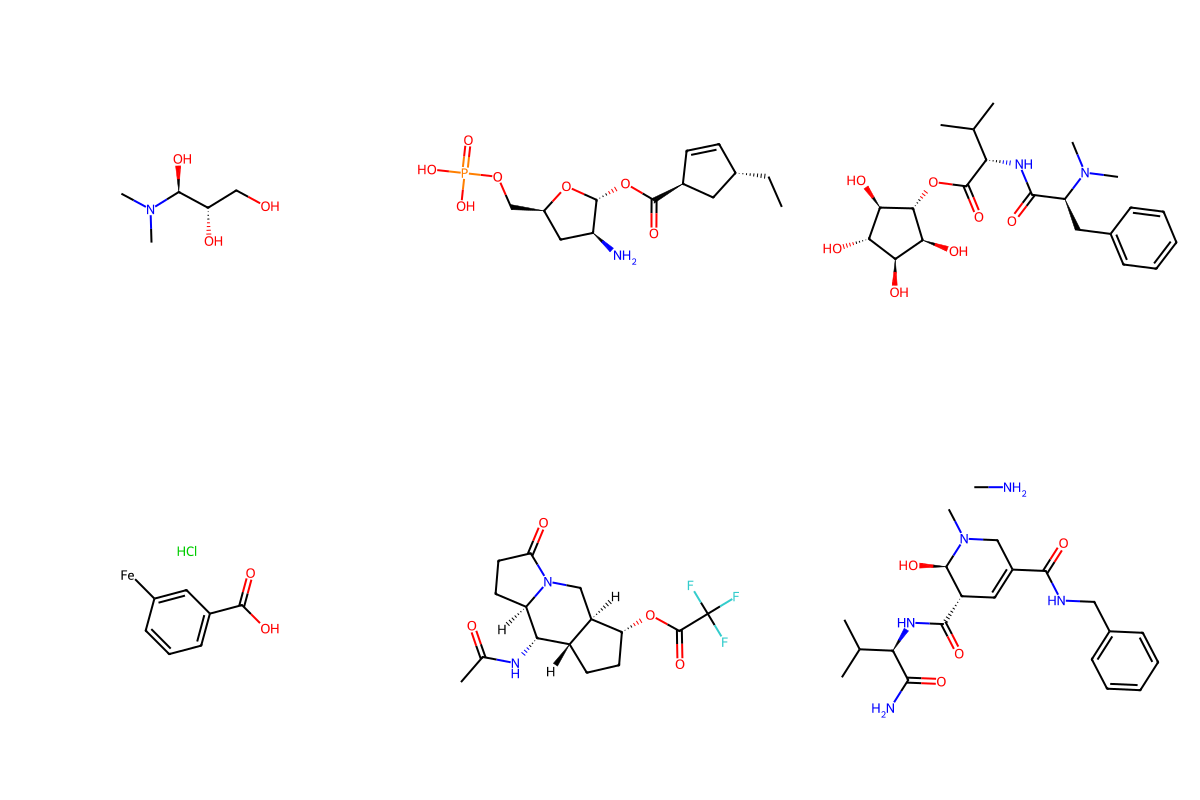

In [11]:
# Standardized molecules
mols_standardized = d3.mols
# Draw the molecules to a grid image
img = Draw.MolsToGridImage(mols_standardized, molsPerRow=3, subImgSize=(400, 400), useSVG=True)
# Get the SVG image from the grid image
svg = img.data
# Display the SVG image using the IPython.display.SVG object
display(SVG(svg))